# <font color=aqua>**DECISION TREE REGRESSOR**</font>

# <font color=blue>**Aprendizaje Supervisado**</font>  


# <font color=dark red>**1. Análisis del negocio**</font>  
Para establecer la calidad del vino, se requiere reconocer las características principales que puedan ayudar a clasificarlos.

Para lo anterior, se debe leer los datos.

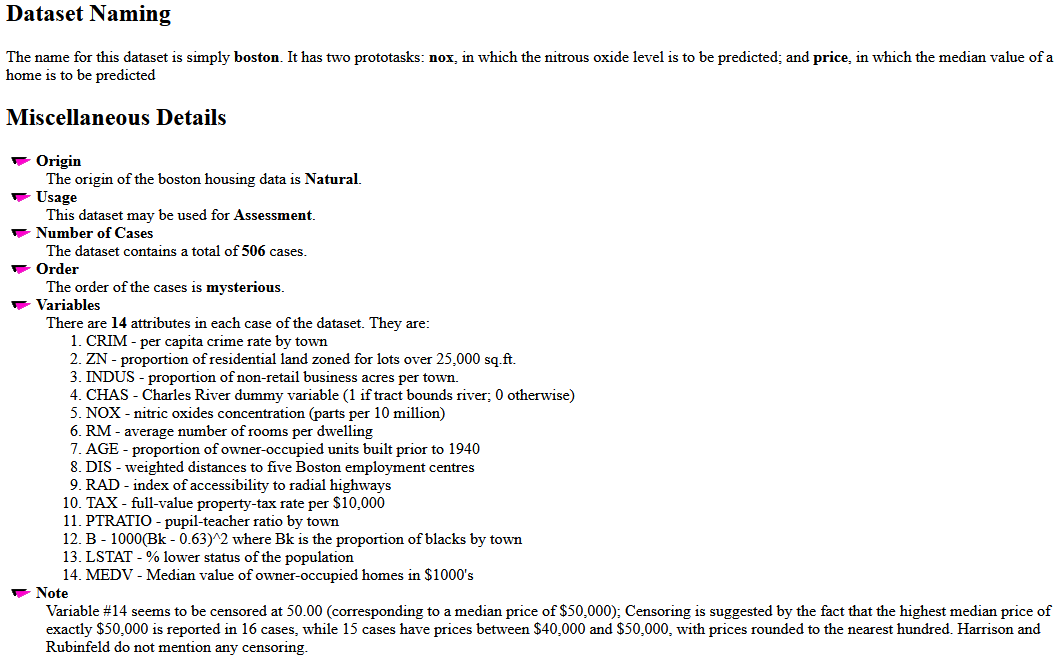

In [ ]:
# Importar algunas librerias base
import pandas as pd
import numpy as np

In [ ]:
# Cargar los datos del archivo  wineq.csv
df = pd.read_csv("Boston_Housing.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# <font color=dark red>**2. Comprension de datos / Análisis exploratorio de datos**</font>  
Analice los datos y determine las características que utilizará, para la regresión.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# <font color=dark red>**3. Preprocesamiento de datos**</font> 
Utilice los modelos o estrategias que Ud. considere necesarias

In [ ]:
# verificacion de valores nulos
df.isnull().values.any()

False

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

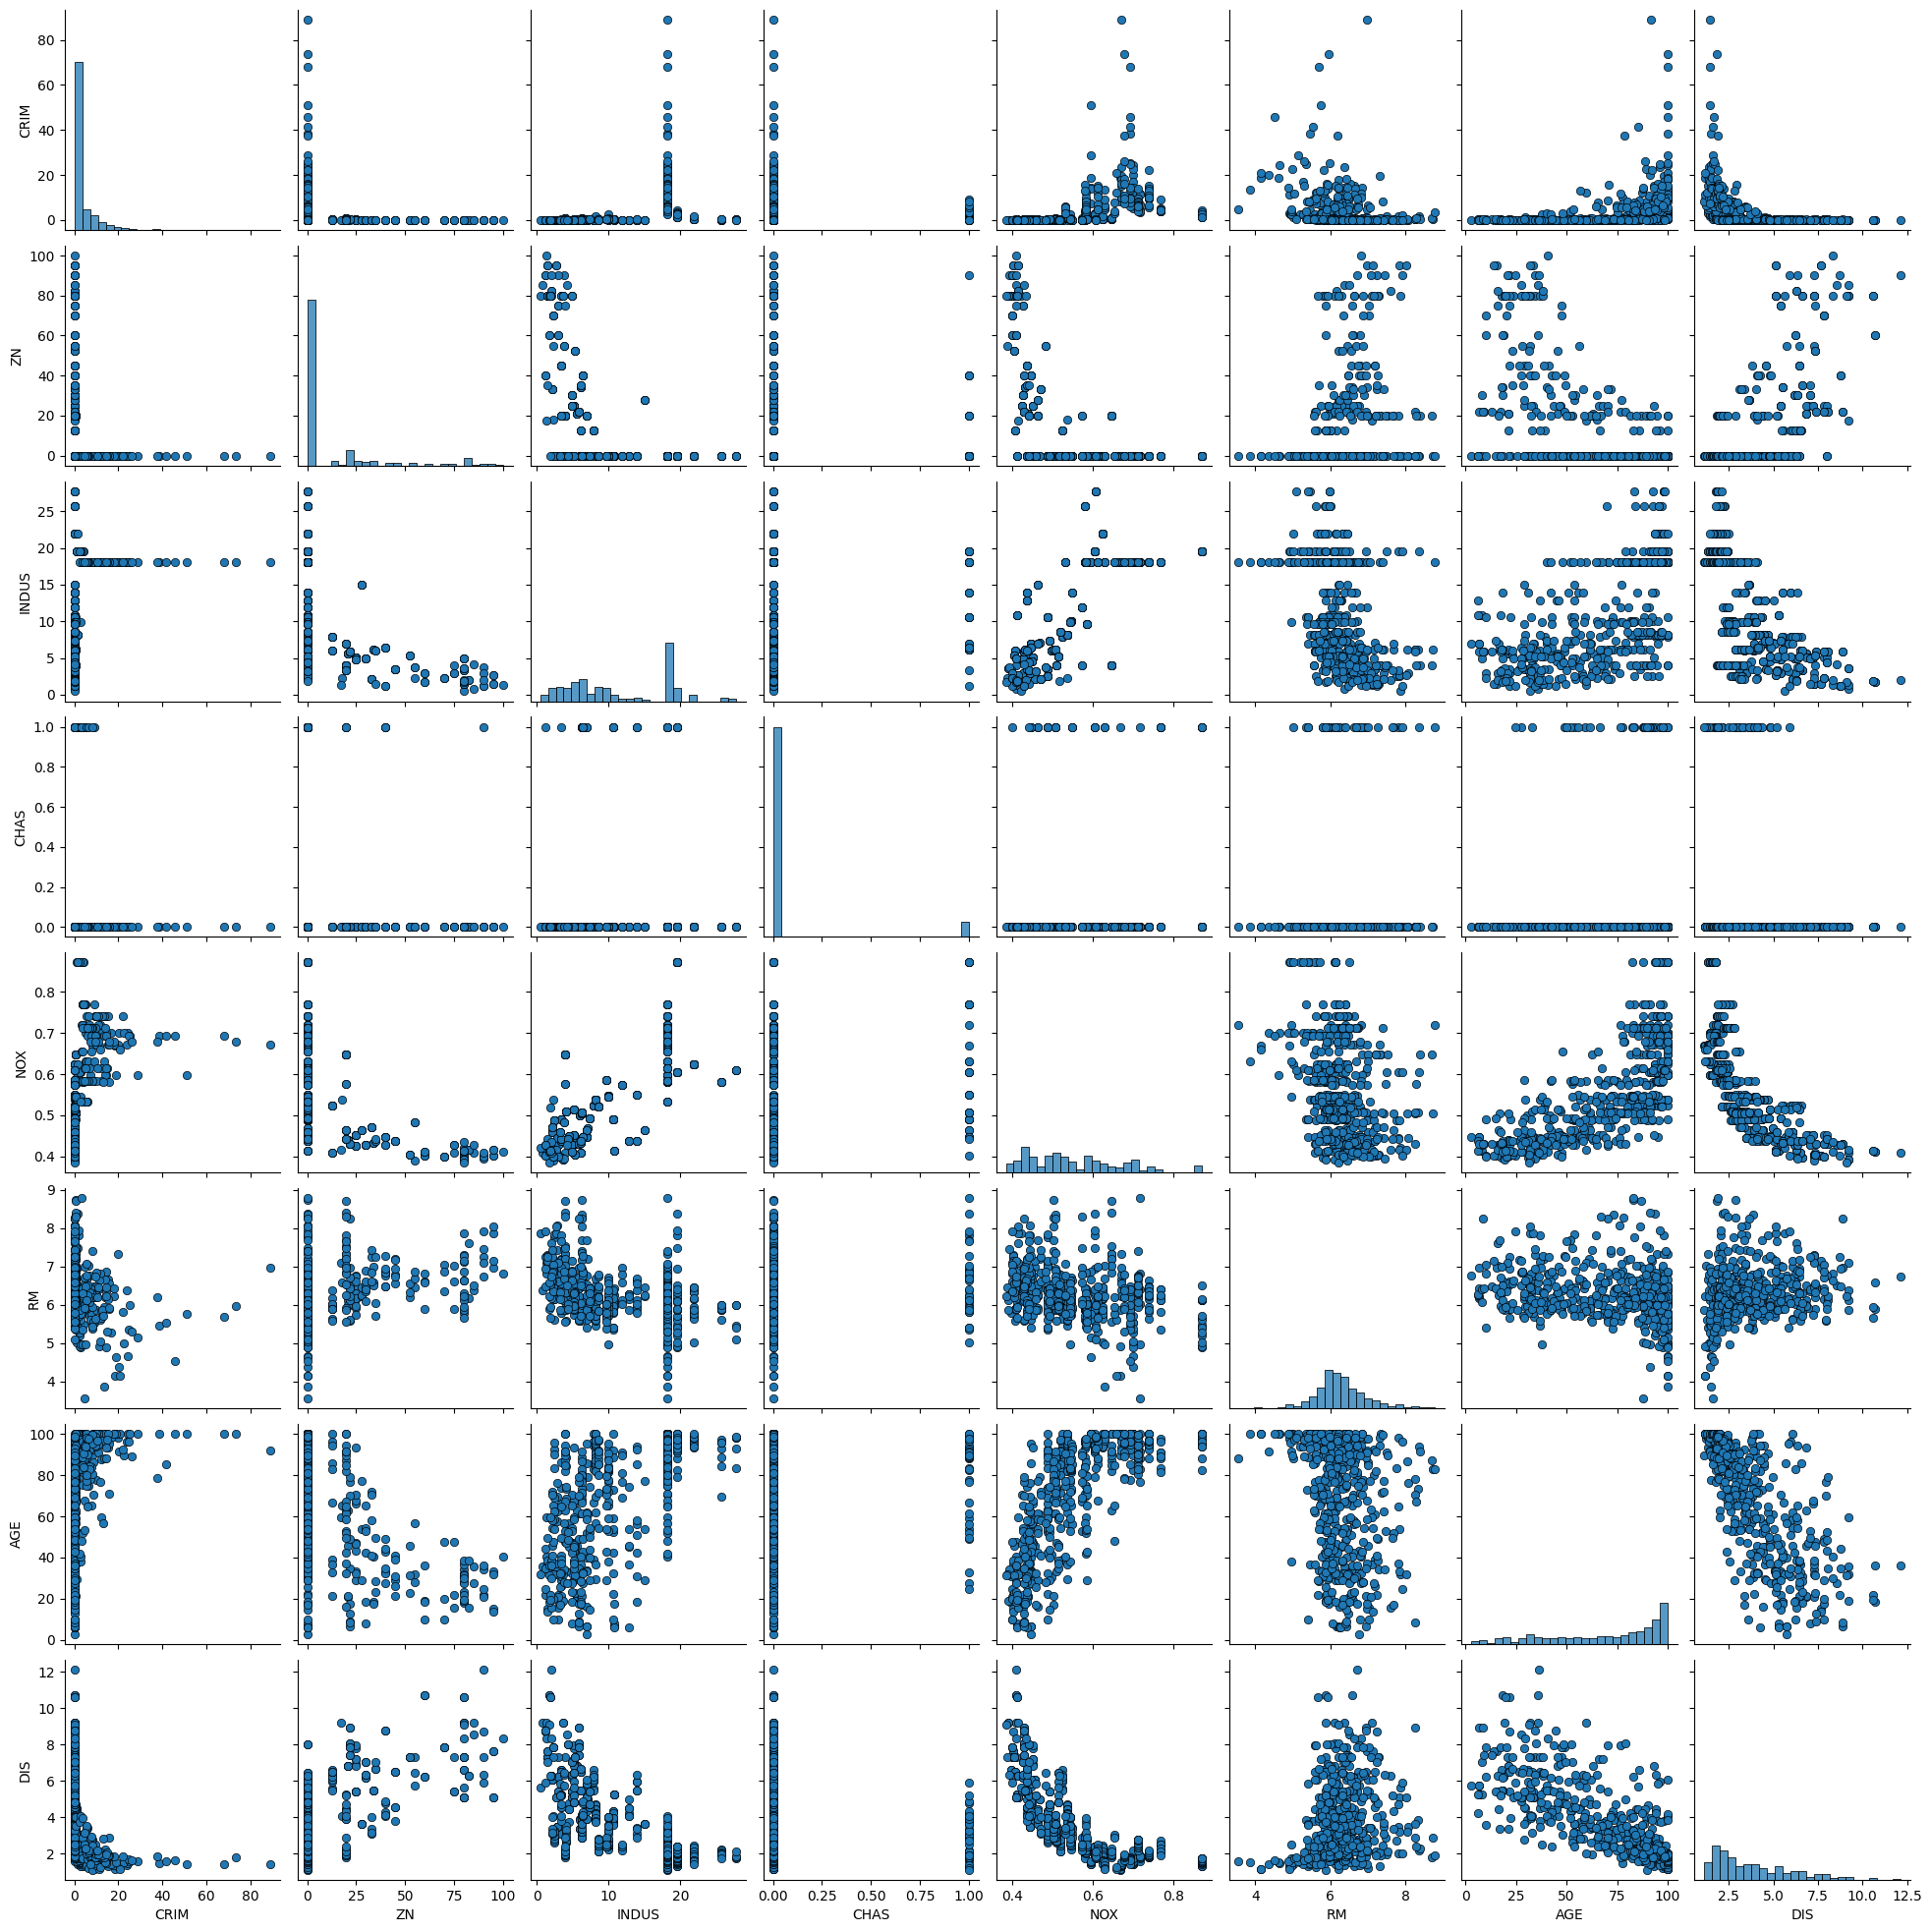

In [ ]:
#matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df[df.columns[0:8]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

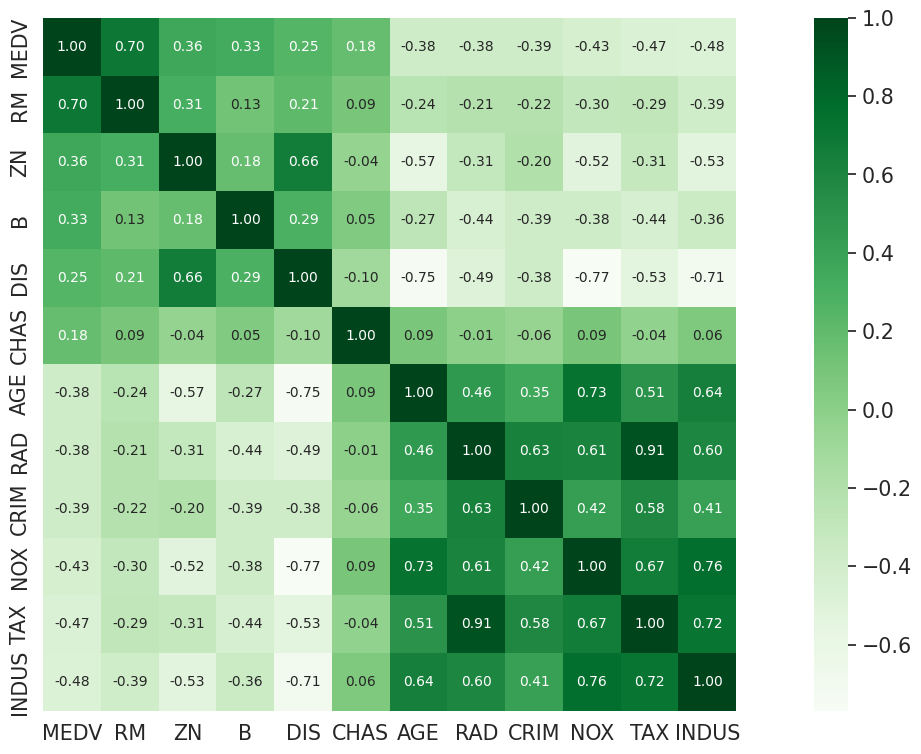

In [ ]:
# OBSERVAR EL GRADO DE CORRELACION ENTRE LAS VARIABLES
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(12 , 'MEDV')['MEDV'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

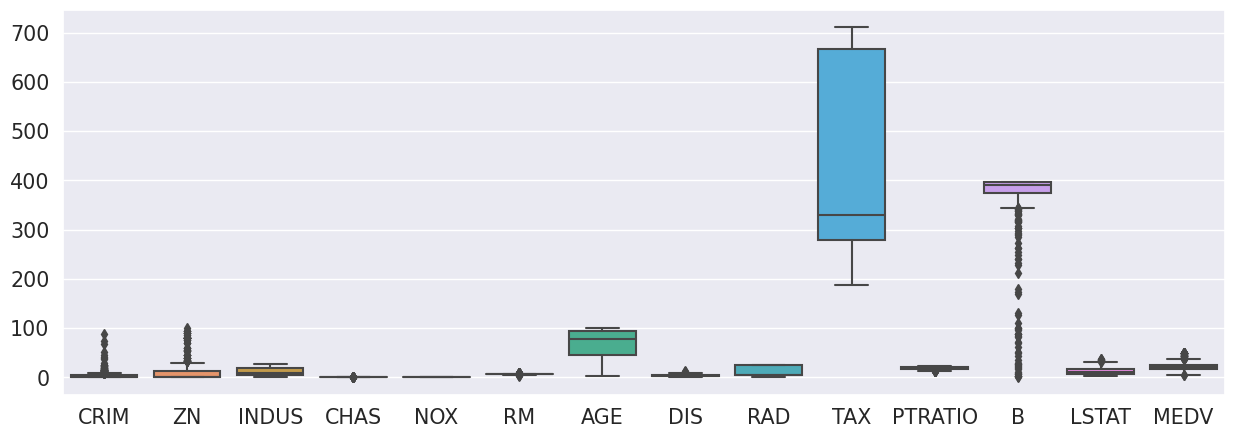

In [ ]:
# BUSQUEDA DE VALORES ATIPICOS (OUTLIERS) mediante gráficas
#boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

In [ ]:
new_df = df.copy()
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## normalizacion de datos

In [ ]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

from sklearn.preprocessing import StandardScaler
scaler_x = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()

scaler_x.fit(X)
scaler_y.fit(np.array(y).reshape(-1,1))


# =========== TRANSFORMANDO =========== 
X = scaler_x.transform(X)
y = scaler_y.transform(np.array(y).reshape(-1,1))

# <font color=dark red>**4. Modelado**</font> 
Aplique por lo menos 3 modelos de clasificación de Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# =========== SEPARACION DE DATOS =========== 

# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# =========== APLICANDO NORMALIZACION A LOS DATOS DE X ==================
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)

# =========== TRANSFORMANDO =========== 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
type(y_train)

numpy.ndarray

## ALGORITMOS DE APRENDIZAJE SUPERVISADO

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# seleccion de modelos
regressor_dtree = DecisionTreeRegressor(max_depth=5)

In [ ]:
# crear un array que almacene las funciones
regressors = [
    ("dtree",regressor_dtree)
    ]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
values = []
scores = []
models_probabilities = []
# iterar las functiones
for nombre, regressor in regressors:
  # entrenar
  regressor.fit(X_train, y_train)
  
  # realizar prediccion(construir y_pred)
  y_pred = regressor.predict(X_test)
  models_probabilities.append(y_pred)
  
  # evaluar los modelos
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f"MODEL: {nombre}")
  print(f"mae: {mae}")
  print(f"mse: {mse}")
  print(f"rmse: {rmse}")
  print(f"r2: {r2}")

MODEL: dtree
mae: 0.2962210857292824
mse: 0.1609715573715811
rmse: 0.4012126086896835
r2: 0.7808234952887785


# <font color=dark red>**5. Visualización de datos clasificados**</font>
Muestre los resultados de las clasificaciones obtenidas con cada modelo 

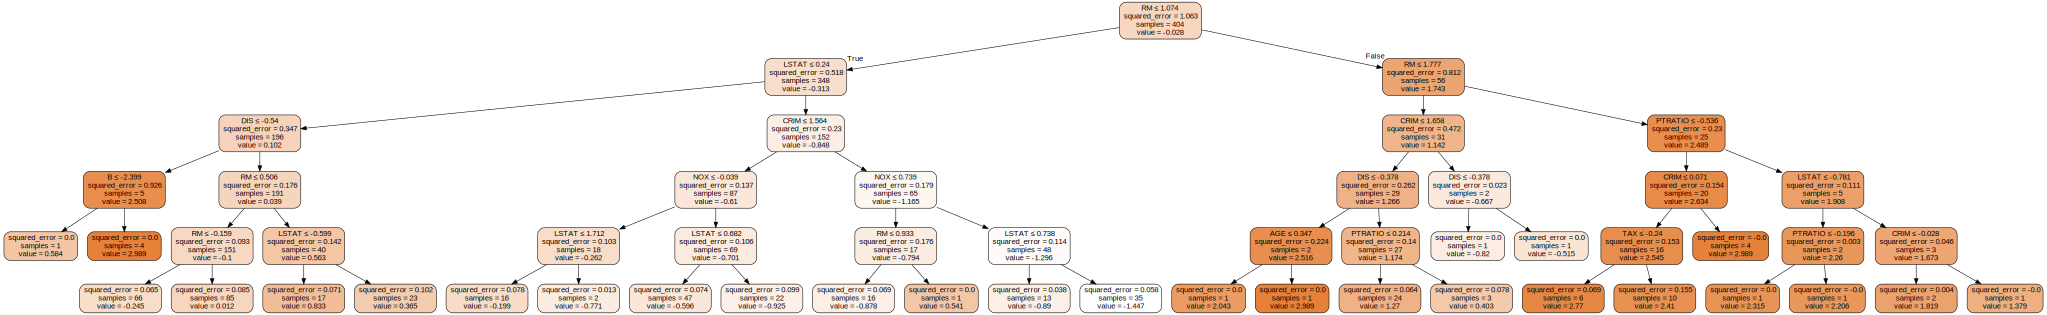

In [ ]:
#from sklearn.datasets import load_boston
#from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# Load the Boston Housing dataset
#boston = load_boston()
#X = boston.data
#y = boston.target

# Train a decision tree regressor
#regressor = DecisionTreeRegressor(max_depth=3)
#regressor.fit(X_train, y_train)
name, regressor = regressors[0]
regressor.fit(X_train, y_train)

colnames = df.columns.tolist()

# Export the decision tree as a dot file
dot_data = export_graphviz(regressor, out_file=None, 
                           feature_names=colnames[:-1],  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Render the decision tree in Jupyter Notebook
graph